# FCED - Statistics Project
#### Group 4
- Jorge Vieira up202204385
- João Fragão up202204384
- Tomás Rodrigues up202202467

## Table of content:
* [Introduction](#intro)
* [Clean the data](#clean)
* [Step 1 : Ask a research question](#step1)
* [Step 2 : Design a study and collect data](#step2)
* [Step 3 : Explore the data](#step3)
    * [Step 3.1 : Define objective variables](#step3.1)
    * [Step 3.2 : Create a new dataframe with objective variables](#step3.2)
        * [Outliers](#out)
        * [Null values](#null)
        * [Description of the dataframe](#desc)
    * [Step 3.3 : Univariate analysis](#step3.3)
        * [DuracaoFogo](#dur)
        * [TempoExtincao](#te)
        * [AreaArdida](#aa)
        * [TempoReacao](#tr)
        * [TipoCausa](#tc)
        * [Regiao](#r)
    * [Step 3.4 : Multivariate analysis](#step3.4)
* [Step 4 : Draw inferences](#step4)
    * [Question 1](#q1)
    * [Question 2](#q2)
    * [Question 3](#q3)
    * [Question 4](#q4)
* [Step 5 : Formulate conclusions](#step5)
    * [Inference 1](#i1)
    * [Inference 2](#i2)
    * [Inference 3](#i3)
    * [Inference 4](#i4)
* [Step 6 : Look back and ahead](#step6)

## Introduction <a class="anchor" id="intro"></a>

In this project our group conducted a statistical investigation based on the method called "Six-Steps Statistical Investigation", using the wildfires in Portugal dataset from 2015, where the process is divided into six fundamental steps:
- Step 1 : Ask a research question
- Step 2 : Design a study and collect data
- Step 3 : Explore the data
- Step 4 : Draw Inferences
- Step 5 : Formulate conclusions
- Step 6 : Look back and ahead

In this notebook we go through all these steps in order to answer our reasearch question and make conslusions about our study. But in order for us to have valid and clean data to work with, we first need to clear our dataset from potential error and null values.

## Clean the data <a class="anchor" id="clean"></a>

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_excel(r'Lista Incendios_2015.xlsx')
df.describe(include='all')
print(len(df.index))

for index, row in df.iterrows():

    if (isinstance(row.DataAlerta, str) and isinstance(row.Data1Intervencao, str) and isinstance(row.DataExtincao, str) and isinstance(row.x, int) and isinstance(row.TipoCausa, str)):
        #print(index)
        d1 = datetime.datetime.strptime(row.DataAlerta[:-4], '%Y-%m-%d %H:%M:%S')
        d2 = datetime.datetime.strptime(row.Data1Intervencao[:-4], '%Y-%m-%d %H:%M:%S')
        d3 = datetime.datetime.strptime(row.DataExtincao[:-4], '%Y-%m-%d %H:%M:%S')
        #print(d1)
        #print(d2)
        #print('-------------')
    else:
        #print('NAO E STRING')
        df.drop(index, inplace=True, axis=0)
        continue
        #print('DROPPED' + str(index))
    
    if(row.x <= 0):
        df.drop(index, inplace=True, axis=0)
        continue

    if (d2 > d3 or d1 > d3 or d1 > d2):
        df.drop(index, inplace=True, axis=0)
        continue
    
    elif (d2 == d3 or d1 == d3 or d1 == d2):

        if (isinstance(row.HoraAlerta, datetime.time) and isinstance(row.Hora1Intervencao, datetime.time) and isinstance(row.HoraExtincao, datetime.time)): 
            if (d2 == d3 and row.HoraExtincao < row.Hora1Intervencao):
                #print('HORAS NAO BATEM')
                df.drop(index, inplace=True, axis=0)
                continue
                #print('DROPPED' + str(index))
            if (d1 == d3 and row.HoraExtincao < row.HoraAlerta):
                #print('HORAS NAO BATEM')
                df.drop(index, inplace=True, axis=0)
                continue
                #print('DROPPED' + str(index))
            if (d1 == d2 and row.Hora1Intervencao < row.HoraAlerta):
                #print('HORAS NAO BATEM')
                df.drop(index, inplace=True, axis=0)
                continue
                #print('DROPPED' + str(index))
            

        else:
            df.drop(index, inplace=True, axis=0)
            continue
        

print(len(df.index))
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#print(df.head(n=5))

23175
15669


## Step 1 : Ask a research question <a class="anchor" id="step1"></a>

The research question we chose to answer with our study is:

*Which variables can interfere with the burned area of the fire outbreak?*

## Step 2 : Design a study and collect data <a class="anchor" id="step2"></a>

This step is where we gather the data and design the study, in this case, the data had already been given to us so the group was able to skip this part of the study.

## Step 3 : Explore the data <a class="anchor" id="step3"></a>
In this step we will explore the data collected through the creation of plots and tables in order for us to visualize our data and the relations between the variables of study. For that, we start by defining our objective variables, then we create a new dataframe only with these variables. After, we analyze each variable on its own (Univariate Analysis) and also several variables at a time to understand the correlation between them (Multivariate Analysis).

### 3.1 : Define objective variables <a class="anchor" id="step3.1"></a>

Our group defined 4 numerical variables and 2 categorical variables as our objective variables: the ones we are going to study in order to answer our research question.

**Numerical variables**:
- `DuracaoFogo` : Duration of the fire, we define this variable as being the difference between the date and hour of the extinction and the date and hour of the alert.
- `AreaArdida` : Burnt area in acres.
- `TempoExtincao` : Time it took to extinguish the fire, we define this variable as being the difference between the date and hour of extinction and the date and hour of the first intervention.
- `TempoReacao` : Time it took for the first intervention to be made, we define this variable as being the difference between the date and hour of first intervention and date and hour of the alert.

**Categorical variables**:
- `TipoCausa` : Type of the cause
- `Regiao` : Region where the fire happened (Interior,Litoral)

### 3.2 : Create a new dataframe with objective variables<a class="anchor" id="step3.2"></a>

In [5]:
from datetime import datetime, date
sns.set(rc = {'figure.figsize':(15,8)})

regiao = []
for line in df.x:
    if(line > 212000):
        regiao.append('Interior')
    else:
        regiao.append('Litoral')

datasAlerta = list(map(lambda x: datetime.strptime(x[:10],'%Y-%m-%d').date(),df.DataAlerta.values))
datasInter = list(map(lambda x: datetime.strptime(x[:10],'%Y-%m-%d').date(),df.Data1Intervencao.values))
datasExtincao = list(map(lambda x: datetime.strptime(x[:10],'%Y-%m-%d').date(),df.DataExtincao.values))

dataHoraAlerta = []
for line1, line2 in zip(df["HoraAlerta"].values,datasAlerta):
        dataHoraAlerta.append(datetime.combine(line2,line1))

dataHoraInter = []
for line1, line2 in zip(df["Hora1Intervencao"].values,datasInter):
        dataHoraInter.append(datetime.combine(line2,line1))

dataHoraExtincao = []
for line1, line2 in zip(df["HoraExtincao"].values,datasExtincao):
        dataHoraExtincao.append(datetime.combine(line2,line1))

def timediff(l1, l2):
    res = []
    for line1, line2 in zip(l1,l2):
        res.append((line1-line2).total_seconds() / 60)
    return res

tempoExtincao = timediff(dataHoraExtincao,dataHoraInter)
duracaoFogo = timediff(dataHoraExtincao,dataHoraAlerta)
tempoReacao = timediff(dataHoraInter, dataHoraAlerta)

dict = {'TempoExtincao' : tempoExtincao, 'DuracaoFogo' : duracaoFogo, 'TempoReacao': tempoReacao,'AreaArdida' : df['AA_Total (pov+mato+agric) (ha)'], 'Regiao' : regiao, 'TipoCausa' : df.TipoCausa}

newdf = pd.DataFrame(dict)

dfSampling = pd.DataFrame(dict)

newdf = newdf[(np.abs(stats.zscore(newdf[['AreaArdida', 'TempoExtincao', 'DuracaoFogo', 'TempoReacao']])) < 3).all(axis=1)]

#### Outliers<a class="anchor" id="out"></a>

**What is an outlier**?

An outlier is some data that differs significantly from the rest of the data in the dataset of analysis. Two different concepts that can be missunderstood as the same thing are noise and outliers. While an outlier is a data point that presents a significate difference from the rest, noise are random errors in the dataset. 

**Our approach**

After examining the data obtained from the processing and realizing that there were some data points that could affect the interpretation and vizualization of the data, we've decided to drop all data points considered necessary. For that we evaluated the Z-score for each value in each quantitative variable, relative to the mean and standard deviation.

#### Null values<a class="anchor" id="null"></a>

In [5]:
newdf.apply(lambda x: sum(x.isnull()), axis=0)

TempoExtincao    0
DuracaoFogo      0
TempoReacao      0
AreaArdida       0
Regiao           0
TipoCausa        0
dtype: int64

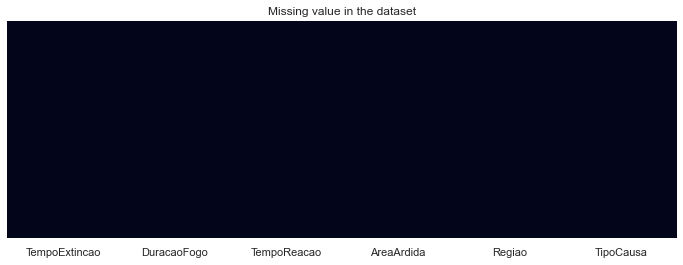

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(newdf.isnull(),cbar=False,cmap='rocket',yticklabels=False)
plt.title('Missing value in the dataset');

As we can observe in the heatmap, there are no null values in our dataframe meaning we can proceed with the data exploration. Taking into account that we previously removed all the incorrect and inconsistent dates.

#### Description of the dataframe<a class="anchor" id="desc"></a>

In [7]:
newdf.describe(include='all')

TempoExtincao   DuracaoFogo   TempoReacao    AreaArdida   Regiao  \
count    15452.000000  15452.000000  15452.000000  15452.000000    15452   
unique            NaN           NaN           NaN           NaN        2   
top               NaN           NaN           NaN           NaN  Litoral   
freq              NaN           NaN           NaN           NaN    11036   
mean       104.397942    117.409332     13.011390      1.653406      NaN   
std         94.911816     96.404496      8.900619      8.523217      NaN   
min          0.000000      0.000000      0.000000      0.000000      NaN   
25%         47.000000     59.000000      7.000000      0.010000      NaN   
50%         79.000000     92.000000     11.000000      0.070000      NaN   
75%        132.000000    146.000000     17.000000      0.500000      NaN   
max       1080.000000   1102.000000     59.000000    181.700000      NaN   

         TipoCausa  
count        15452  
unique           5  
top     Negligente  
freq          5670  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

With this description of the dataframe we can already have a good idea of how the data of each variable is distributed. But we need to go a little deeper into our analysis in order for us to retrieve more information.

### 3.3 : Univariate analysis<a class="anchor" id="step3.3"></a>
In this subsection, we will analyze each variable individually so that we have a better understanding of how the data relative to each of the variables is distributed and make some individual conclusions.

#### `DuracaoFogo`<a class="anchor" id="dur"></a>

In [8]:
newdf['DuracaoFogo'].describe(include='all')

count    15452.000000
mean       117.409332
std         96.404496
min          0.000000
25%         59.000000
50%         92.000000
75%        146.000000
max       1102.000000
Name: DuracaoFogo, dtype: float64

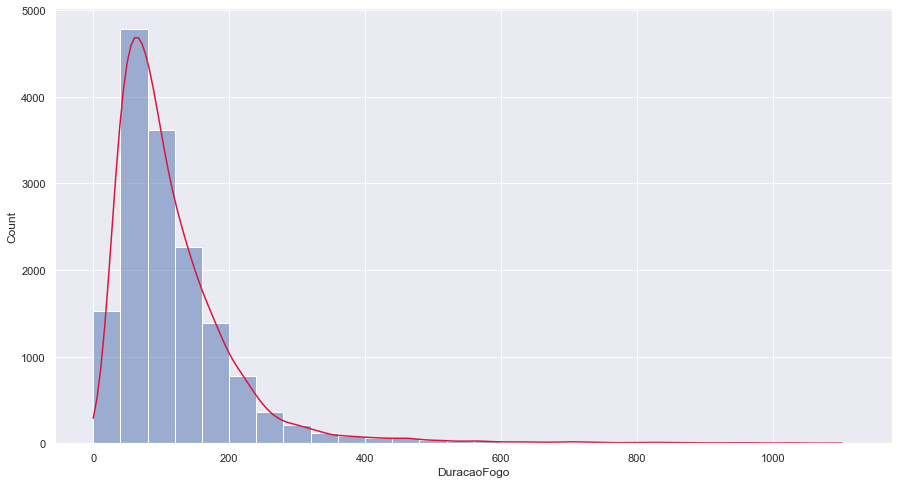

In [9]:
ax = sns.histplot(x = newdf.DuracaoFogo, binwidth = 40, kde = True)
ax.lines[0].set_color('crimson')

**NOTE** : In this plot, the width of each bin is 40 minutes

<AxesSubplot:xlabel='DuracaoFogo'>

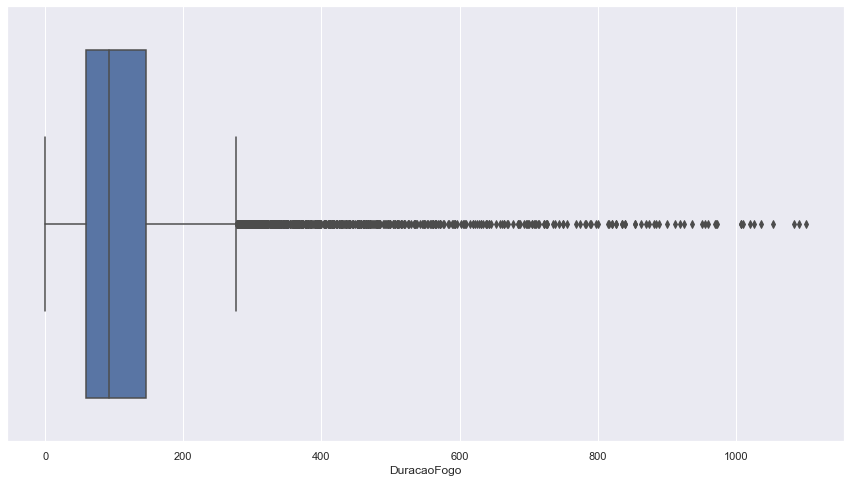

In [10]:
sns.boxplot(x = newdf.DuracaoFogo)

**What can we conclude about** `DuracaoFogo`?
- Most fires last between 40 and 80 minutes
- 75% of all fires last for 148 minutes or less
- On average fires last for, approximately, 118 minutes
- Even though we removed outliers that were bigger than 3 times the standard deviation, the fire with the longest duration is 1102 minutes long, which is much longer than 75% of all fires.

#### `TempoExtincao`<a class="anchor" id="te"></a>

In [11]:
newdf['TempoExtincao'].describe(include='all')

count    15452.000000
mean       104.397942
std         94.911816
min          0.000000
25%         47.000000
50%         79.000000
75%        132.000000
max       1080.000000
Name: TempoExtincao, dtype: float64

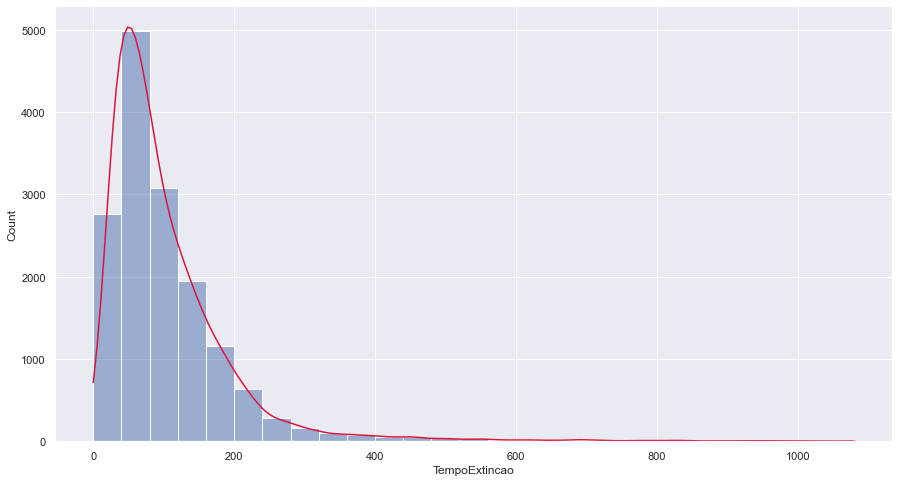

In [12]:
ax = sns.histplot(x = newdf.TempoExtincao, binwidth = 40, kde = True)
ax.lines[0].set_color('crimson')

**NOTE** : In this plot, the width of each bin is 40 minutes

<AxesSubplot:xlabel='TempoExtincao'>

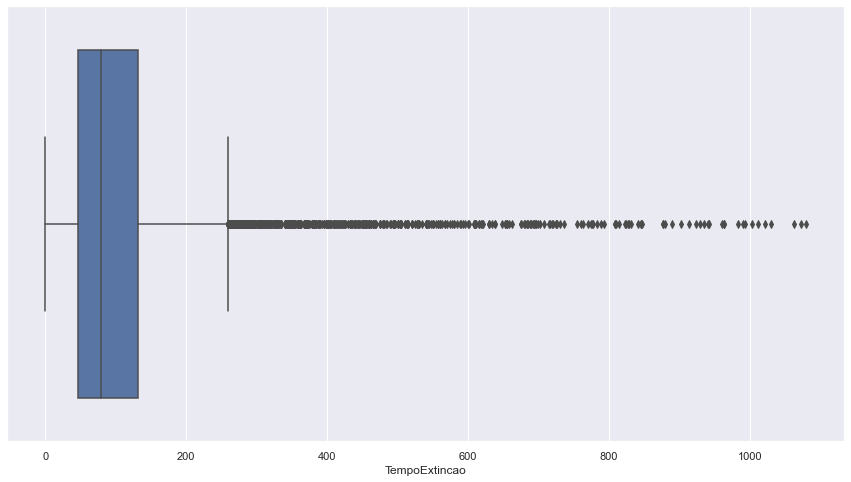

In [13]:
sns.boxplot(x = newdf.TempoExtincao)

**What can we conclude about** `TempoExtincao`?
- Most fires take between 40 and 80 minutes to be extinguished
- 75% of all fires take 133 minutes or less to be extinguished
- On average fires take, approximately, 118 minutes to be extinugished
- Even though we removed outliers that were bigger than 3 times the standard deviation, the fire that took the longest to be extinguished, took 1080 minutes, which is much longer than 75% of all fires.

#### `AreaArdida`<a class="anchor" id="aa"></a>

In [14]:
newdf['AreaArdida'].describe(include='all')

count    15452.000000
mean         1.653406
std          8.523217
min          0.000000
25%          0.010000
50%          0.070000
75%          0.500000
max        181.700000
Name: AreaArdida, dtype: float64

(0.0, 5.0)

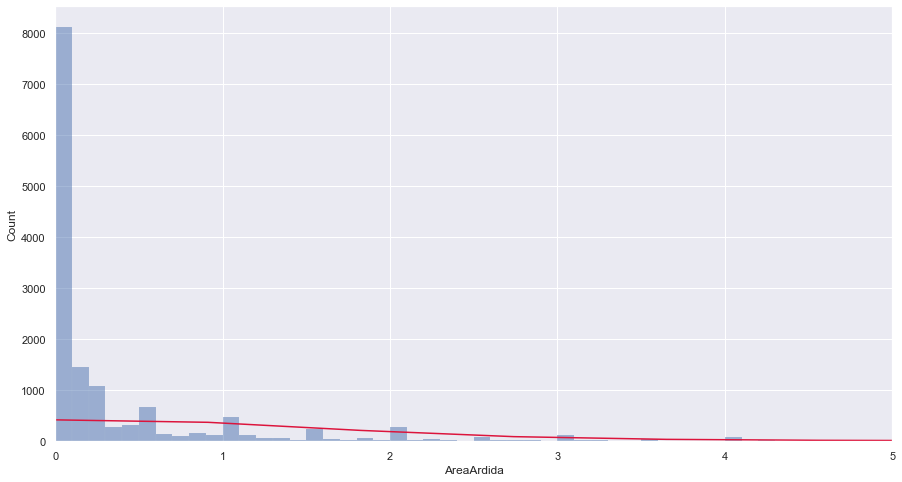

In [15]:
ax = sns.histplot(x = newdf.AreaArdida, binwidth = 0.1 , kde = True)
ax.lines[0].set_color('crimson')
plt.xlim(0,5)

**NOTE** : In this plot, the width of each bin is 0.1 acres

(0.0, 2.0)

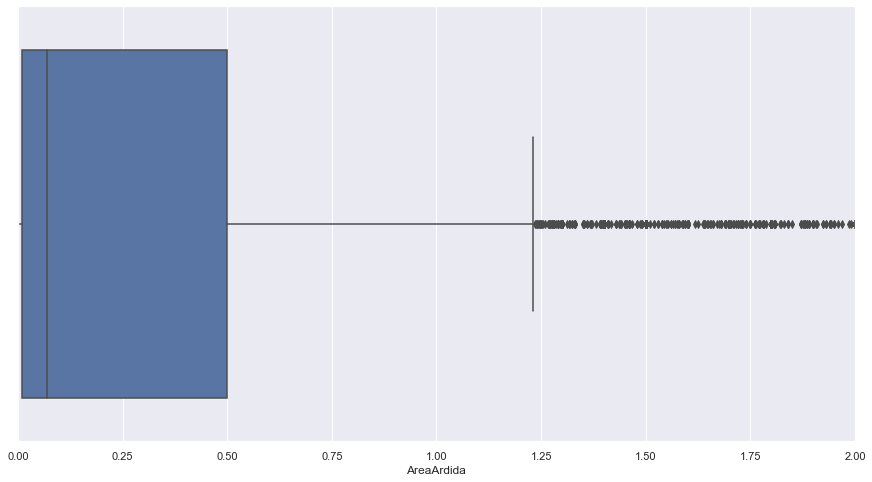

In [16]:
sns.boxplot(x = newdf.AreaArdida)
plt.xlim(0,2)

**What can we conclude about** `TempoExtincao`?
- Most fires burn between 0 and 0.1 acres of land, which means most fires have a small dimension.
- 75% of all fires burn 0.5 acres or less.
- On average fires burn, approximately, 1.6 acres of land. Which is way above the maximum of the 75%, this means that there are fires with very big dimensions which increase the mean by a lot.
- Even though we removed outliers that were bigger than 3 times the standard deviation, the fire that burnt the most land , burnt 181.7 acres, which is a much bigger area than 75% of all fires.

#### `TempoReacao`<a class="anchor" id="tr"></a>

In [17]:
newdf['TempoReacao'].describe(include='all')

count    15452.000000
mean        13.011390
std          8.900619
min          0.000000
25%          7.000000
50%         11.000000
75%         17.000000
max         59.000000
Name: TempoReacao, dtype: float64

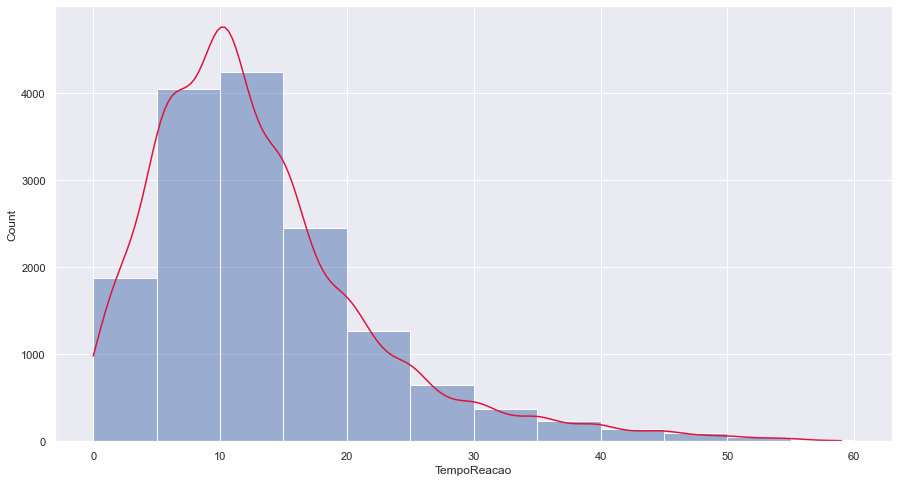

In [18]:
ax = sns.histplot(x = newdf.TempoReacao, binwidth = 5 , kde = True)
ax.lines[0].set_color('crimson')

**NOTE** : In this plot, the width of each bin is 5 minutes

<AxesSubplot:xlabel='TempoReacao'>

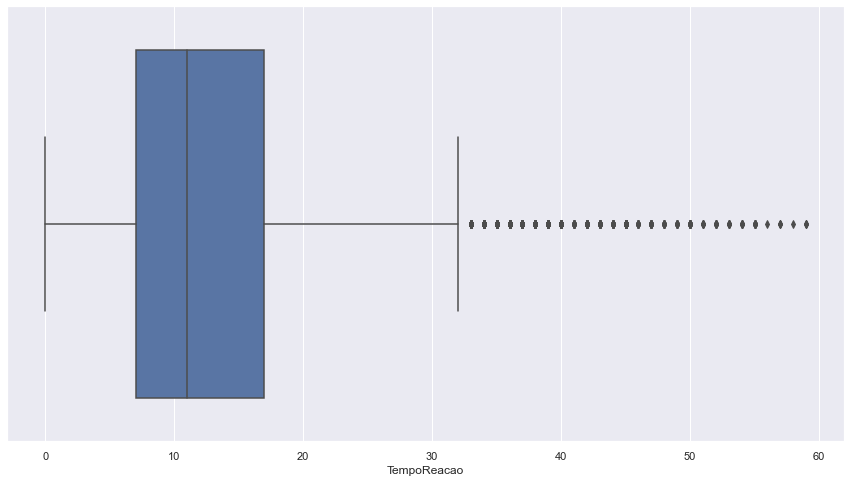

In [19]:
sns.boxplot(x = newdf.TempoReacao)

**What can we conclude about** `TempoReacao`?
- Most fires take between 10 and 15 minutes to have their first intervention. Although the interval between 5 and 10 minutes has almost as many fires as the 10 and 15 one.
- 75% of all fires take 17 minutes or less to have their first intervention.
- On average fires take, approximately, 13 minutes to have their first intervention.
- In this case we don't have outliers that are way above the mean value, which doesn't affect the mean too much, making it very close to the most common values.

#### `TipoCausa`<a class="anchor" id="tc"></a>

In [20]:
newdf['TipoCausa'].describe(include='all')

count          15452
unique             5
top       Negligente
freq            5670
Name: TipoCausa, dtype: object

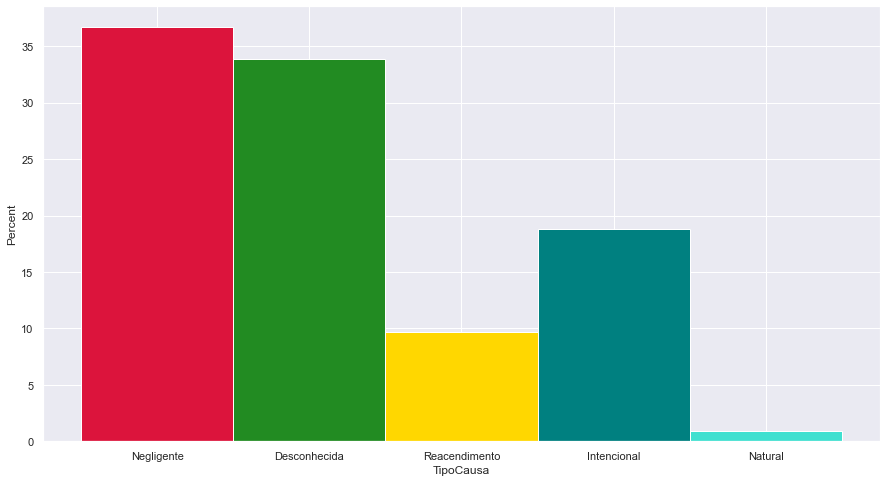

In [21]:
ax = sns.histplot(x = newdf.TipoCausa, stat = 'percent', palette = 'pastel')
ax.patches[0].set_facecolor('crimson')
ax.patches[1].set_facecolor('forestgreen')
ax.patches[2].set_facecolor('gold')
ax.patches[3].set_facecolor('teal')
ax.patches[4].set_facecolor('turquoise')

**What can we conclude about** `TipoCausa`?
- The most common cause of fires is negligent followed by unknown cause. These two causes combined add up to more than 60% of the causes of all fires.
- There are very few fires caused by natural causes (around 1%)

#### `Regiao`<a class="anchor" id="r"></a>

In [22]:
newdf['Regiao'].describe(include='all')

count       15452
unique          2
top       Litoral
freq        11036
Name: Regiao, dtype: object

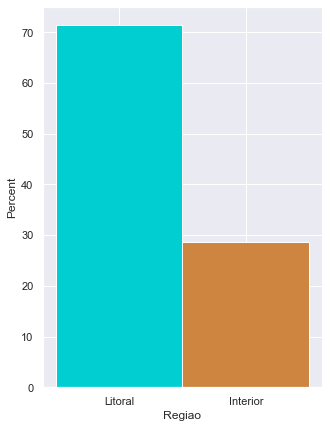

In [23]:
plt.figure(figsize = (5,7))
ax = sns.histplot(x = newdf.Regiao, stat = 'percent')
ax.patches[0].set_facecolor('darkturquoise')
ax.patches[1].set_facecolor('peru')

**What can we conclude about** `Regiao`?
- The region with most fires is Litoral (coast) with more than 70% of all fires.
- The Interior region has around 29% of all fires, which is way less than the Litoral region.

### 3.4 : Multivariate analysis<a class="anchor" id="step3.4"></a>

In this section we will analyze the relation between the variables chosen for analysis, so we can get a better understading of the data and formulate inferences.

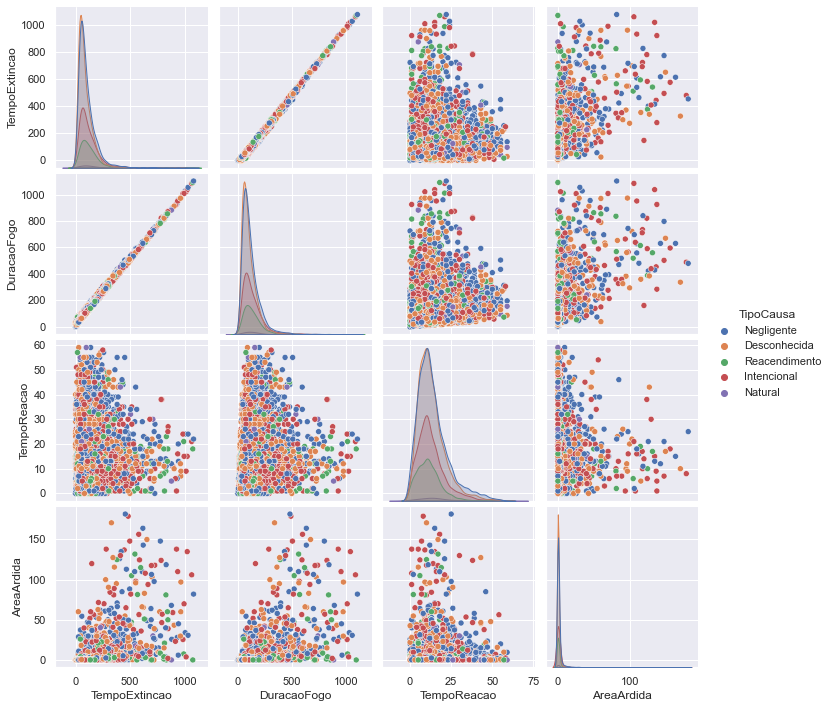

In [24]:
sns.pairplot(newdf, hue="TipoCausa")

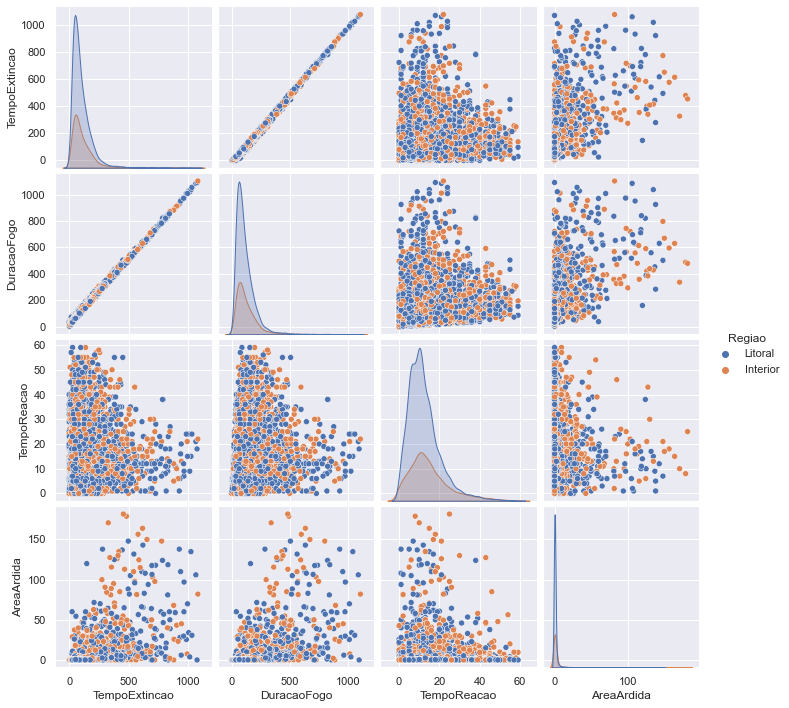

In [25]:
import seaborn as sns
sns.pairplot(newdf, hue="Regiao")

In the plots represented above, we can observe the relations between all the quantitative variables in our dataframe of study, separated by type of cause of the fire and by the region of ocurrence, respectively. 
From this analysis we cannot conclude that there is a strong relation between the variables, except for the duration of the fire and its extinguishing time, which have a strong correlation between them.

<AxesSubplot:xlabel='TipoCausa', ylabel='AreaArdida'>

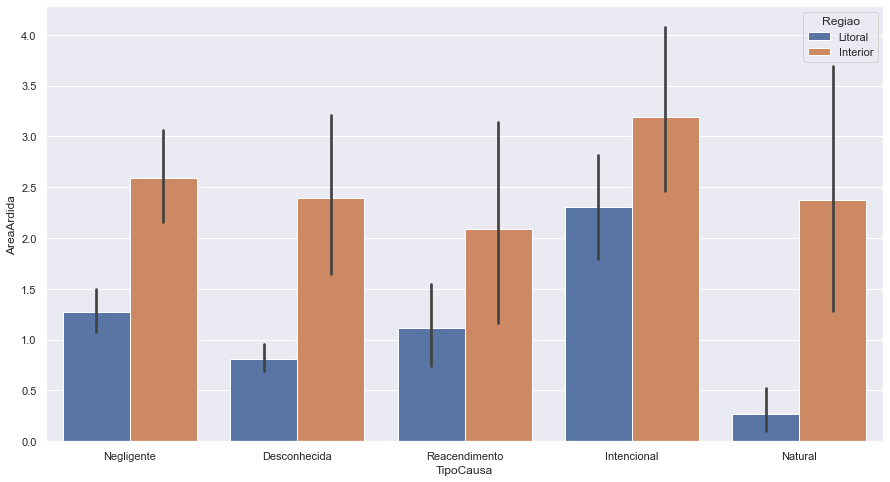

In [26]:
sns.barplot(
data=newdf,
x="TipoCausa", y="AreaArdida", hue="Regiao")

Taking a closer look at the average burnt area, separated by the type of cause and region of ocurrence we can notice a slight difference between the average burnt area in the interior region, thus being higher than in the coast region. 

<AxesSubplot:xlabel='Regiao', ylabel='count'>

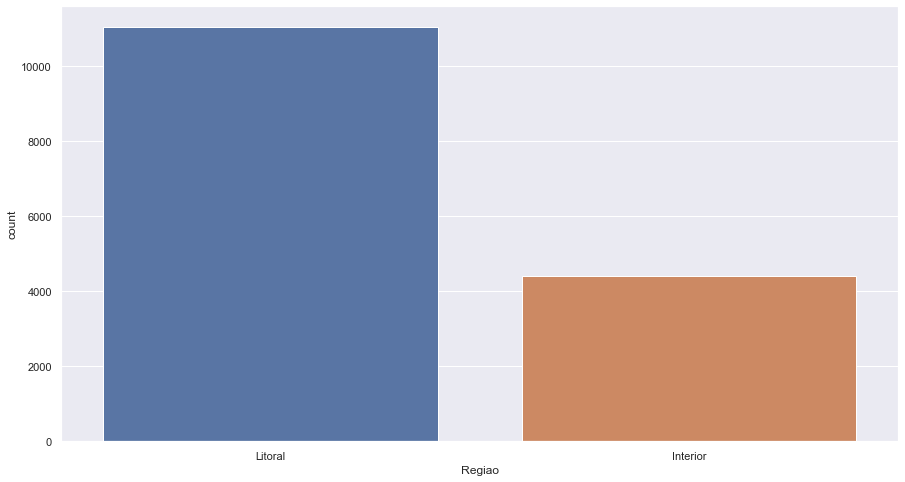

In [27]:
sns.countplot(x="Regiao", data=newdf)

Going further into the analysis and as mentioned in the univariate section, we can observe that the number of fires in the coast area is significantly higher than in the interior region.

<AxesSubplot:xlabel='Regiao', ylabel='AreaArdida'>

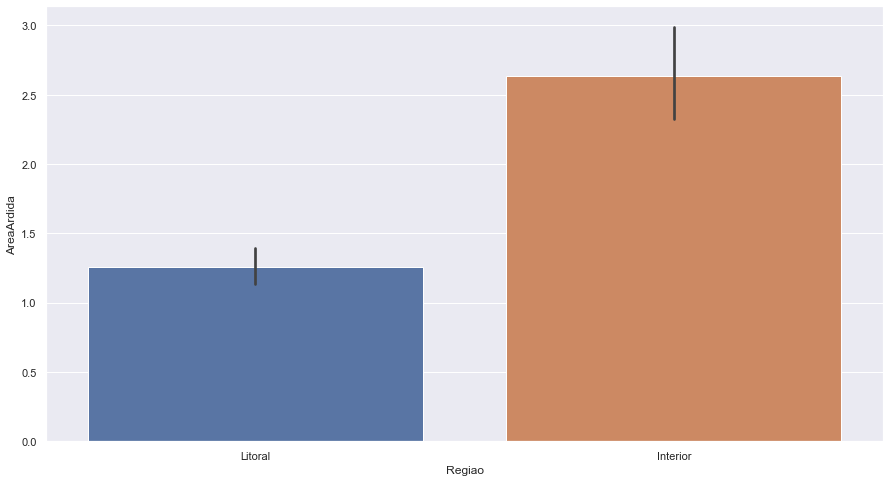

In [28]:
sns.barplot(
data=newdf,
x="Regiao", y="AreaArdida")

In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(newdf, title="DataFrame profile report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='AreaArdida', ylabel='TempoExtincao'>

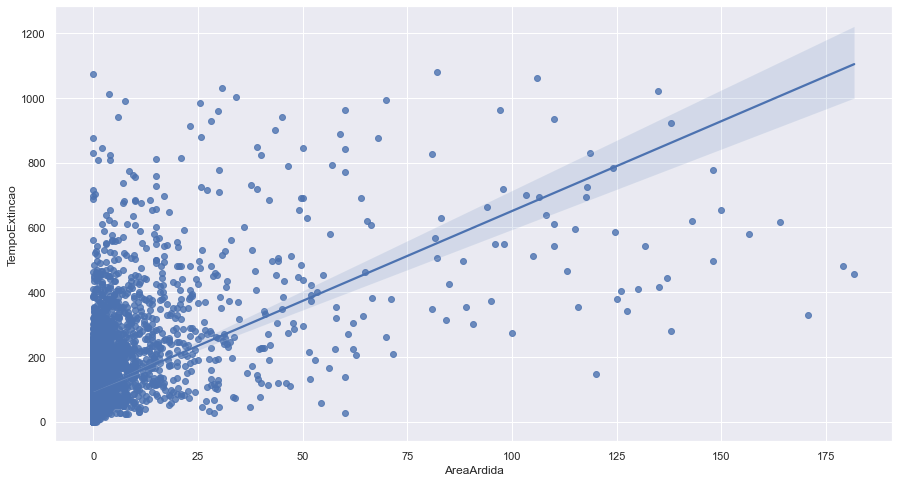

In [11]:
sns.regplot(data=newdf, x='AreaArdida', y='TempoExtincao')

Taking a look at our multivariate analysis we can conclude that there are some correlations that were found, mainly high correlations, them being:
- Between the variables `TempoExtincao` and `DuracaoFogo`, wich is easy to determine since the duration of the fire is calculated using the time of extinguishing so it directly affects it.
- Between the variables `AreaArdida` and `TempoExtincao` wich is a very interesting senseful correlation

We can also observe (bar plots) that despite the coast region having more fire outbreaks, the mean burnt area by those fires is significally lower than the mean burnt area in interior region, meaning that the proportion of bigger fire outbreaks is higher in this region compared to the coast region.

## Step 4 : Draw inferences<a class="anchor" id="step4"></a>

### Question 1<a class="anchor" id="q1"></a>

*Can we claim, with 99% certainty, that 70% of the fire outbreaks with area below 10ha occur on Litoral?*

In [30]:
lista = []
for i in range(1,30):
    df = dfSampling[dfSampling.AreaArdida < 10].sample(n=50)
    df = sum(df['Regiao'] == 'Litoral')
    lista.append(df)

x1 = np.array(lista)

In order to obtain the samples needed for the inferences and taking conclusions, we took advantage of python to generate 29 random samples of 50 rows each, where the burnt area was below 10 acres and the fire took place in coast region. After the values were grouped, we computed the mean and the variance to help with the calculations.

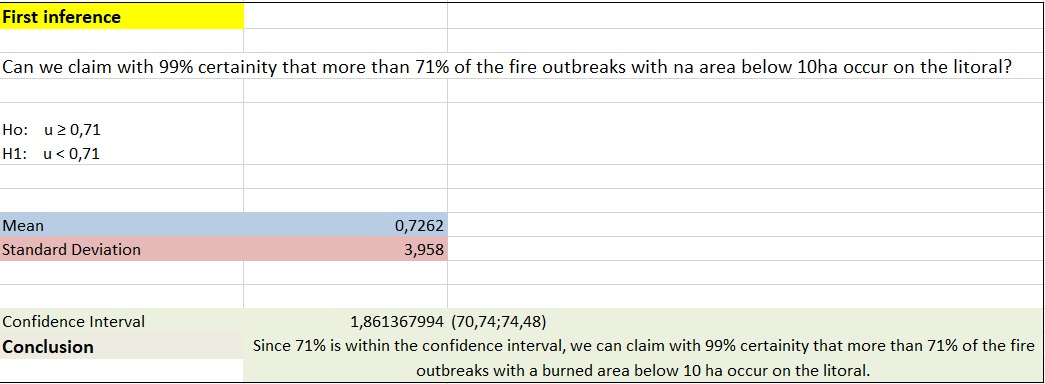

In [31]:
from IPython. display import Image
Image("inf1.jpeg")

<AxesSubplot:ylabel='Count'>

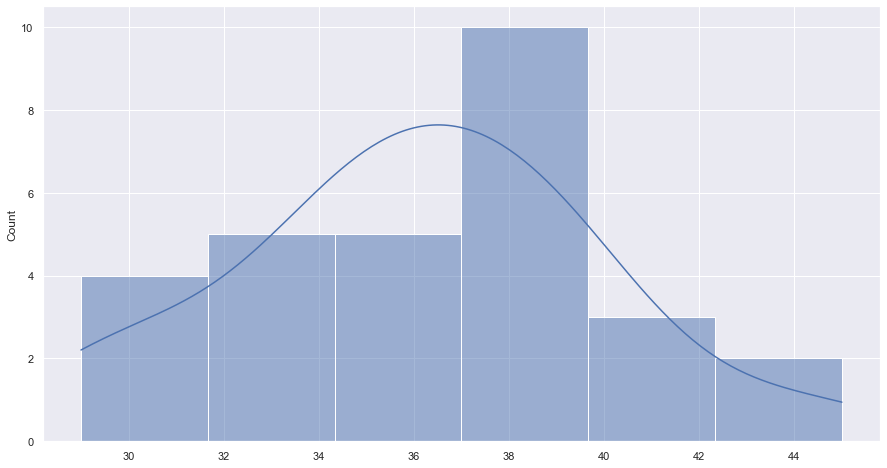

In [32]:
sns.histplot(x=x1, kde=True)

- This histogram graph has, on the x line, the number of times that the fire outbreaks occur on the coast out of 50 rows. The y line represents the number of times that those occurrences happen out of 29 samples.
- We can see that this histogram follows a normal distribution, which we used to make the inference of the number of fires, in percentage, that take place on the coast in comparison to the ones that take place in the interior.

### Question 2<a class="anchor" id="q2"></a>

*Can we claim, with 99% certainty, that more than 35% of all fires with an extension above 100ha had an intentional cause?*

In [33]:
lista2 = []
for i in range(0,20):
    df = dfSampling[dfSampling.AreaArdida > 100].sample(n=30)
    df = sum(df['TipoCausa'] == 'Intencional')
    lista2.append(df)

x2 = np.array(lista2)

Similiar to the procedure followed in the previous inference, we took 20 random samples with a size of 30 units where the burnt area was below 100 acres and the type of cause was intencional. Following the calculation of the mean and variance for the values obtained.

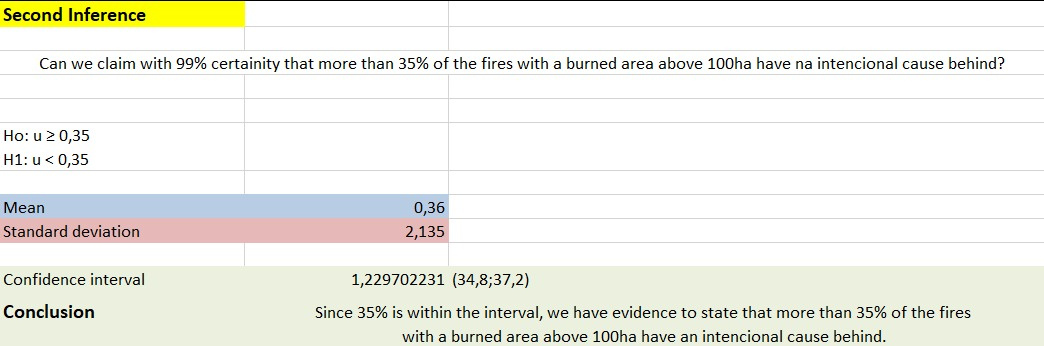

In [34]:
Image("inf2.jpeg")

<AxesSubplot:ylabel='Count'>

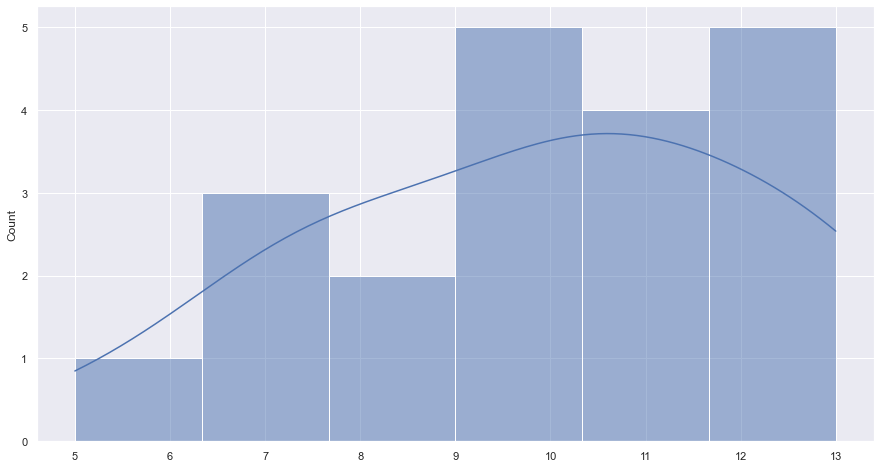

In [35]:
sns.histplot(x=x2, kde=True)

- Similarly to the previous graph, this histogram represents on the x line the number of fire outbreaks

### Question 3<a class="anchor" id="q3"></a>

*Can we claim, with 99% certainty, that the Interior's `AreaArdida` mean is superior to Litoral's?*

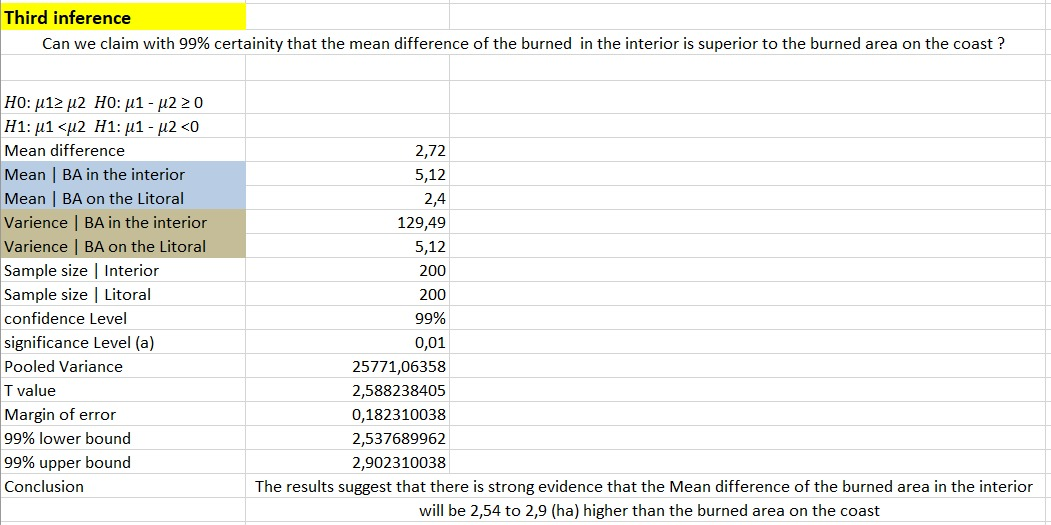

In [36]:
Image("inf3.jpeg")

(0.0, 4.0)

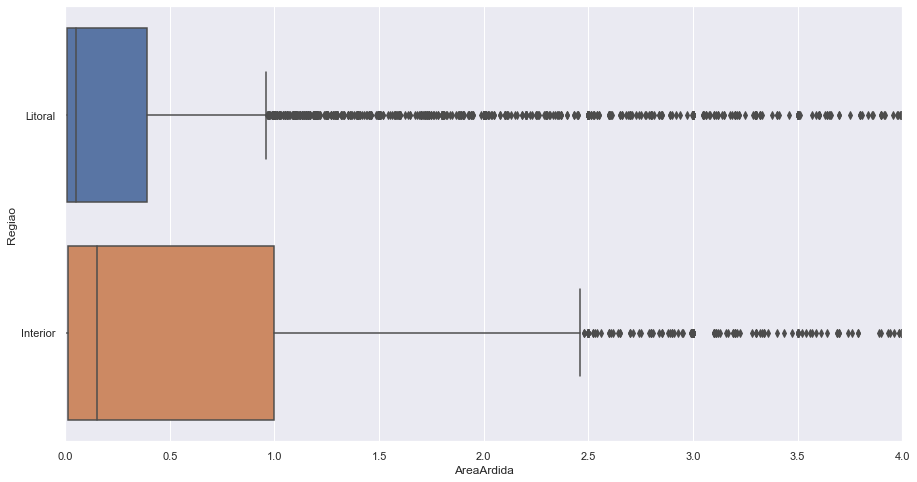

In [37]:
sns.boxplot(
data=newdf,
x="AreaArdida", y="Regiao")
plt.xlim(0,4)

- This graph represents two boxplots that aim at analyzing the burned area on the litoral and in the interior. We can see that, on average, the interior has a wider burned area, since the median has a higher value which extends to a significantly higher third quartile and maximum values. That made us test if the mean difference between the burned area was higher in the interior through a statistical inference.

### Question 4<a class="anchor" id="q4"></a>

*Can we claim with 99% certainty that the mean difference of the burned area that has a natural cause behind, is superior to the one with an intencional cause behind?*

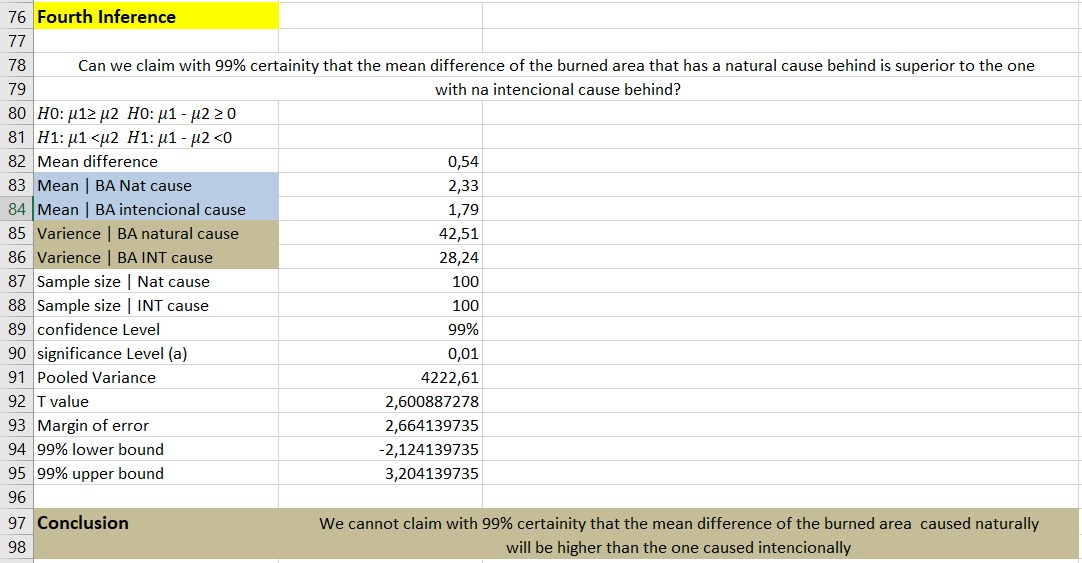

In [38]:
Image("inf4.jpeg")

(0.0, 2.0)

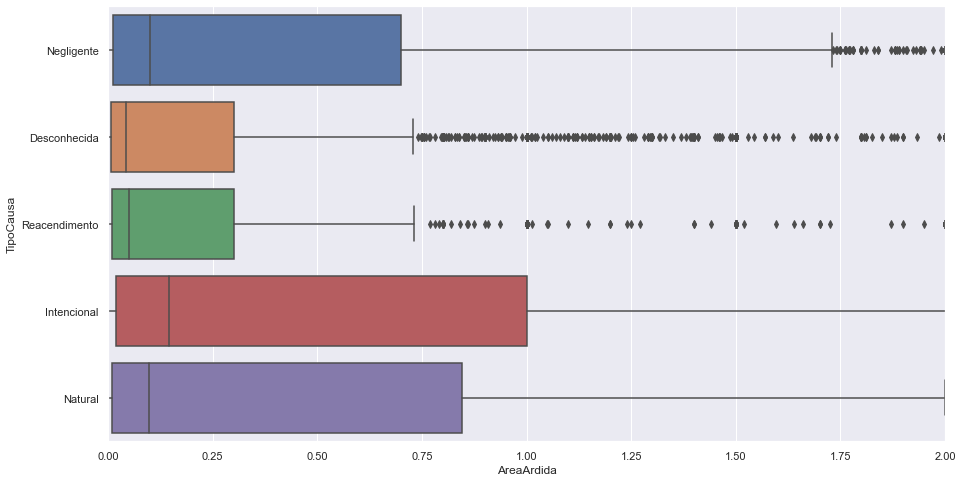

In [39]:
sns.boxplot(
data=newdf,
x="AreaArdida", y="TipoCausa")
plt.xlim(0,2)

- This graph represents multiple boxplots with the burned area per cause. 
  We can see that the cause “Unknown” and “Reigniton” are very similar, with the lowest median and third quartile.    Whereas the cause “Intencional” stands out from the other ones, with the highest median and third quartile. “Negligence” and “Natural” causes are very similar when it comes to de median and the spread of the third quartile. 

## Step 5 : Formulate conclusions<a class="anchor" id="step5"></a>

### Inference 1<a class="anchor" id="i1"></a>

The number of fire outbreaks on the coast is significantly higher than the number of occurrences on the interior. More than 70% of the fire occurrences take place on the coast, and around 30% take place in the interior. This means that the litoral area is a lot more sensitive to having fire outbreaks.
This statement can be proved based upon the graphs and our statistical inference that proves our statement right!

### Inference 2<a class="anchor" id="i2"></a>
Another conclusion that we can make from doing this project and analyzing the data is that more than ⅓ of the big fires (BA > 100ha) have an intentional cause behind. From all the causes, this is the one that originates wider burned areas, among all 5 causes.

### Inference 3<a class="anchor" id="i3"></a>
Even though the litoral has more fire occurrences which do not spread that much and result in small burned areas (<10ha), the interior contrasts this statement by having wider burned areas, when compared to the coast. The mean difference is higher for the burned areas in the interior.

### Inference 4<a class="anchor" id="i4"></a>
We cannot say that the burned areas that result with a natural cause behind have a wider burned area than the ones that result from an intentional cause. If we pick random samples, the mean difference might be higher for the natural cause, but it also could be higher for the intentional cause, and therefore, we could not make any statistical inference about this through our study.

## Step 6 : Look back and ahead<a class="anchor" id="step6"></a>

Overall, the group feels satisfied with the results of the study. We were able to explore all the data relative to the chosen variables, search for relations between them, extract meaningful information from our research and, of course, with it reach an answer to our initial **research question**.

Due to the small scale of the research, we couldn't study all the variables available to us. There probably were other factors that affected the duration of the fires, but we couldn't cover them all in our study. In addition to the variables in the dataset the group considers that there were other factors, that could give us more information about what really affects the duration of fires in Portugal, some of them being:
- Time of day (this was possible to calculate with the data available, although it was not used in our study)
- Humidity
- Wind
- Vegetation density
- Temperature
- Proximity to a fire department
- Slope of the terrain

Another aspect of our study that might have affected its overall result, is the fact that we removed outliers in order to have cleaner data, that was easier to visualize. By getting rid of these extreme values we were able to focus on the more common data, but leaving behind some results that would've given us the full picture of all the data. 